In [ ]:
import pandas as pd

# Load data into separate variables
products = pd.read_csv('/content/products.csv')
aisles = pd.read_csv('/content/aisles.csv')
departments = pd.read_csv('/content/departments.csv')
order_products_prior = pd.read_csv('/content/order_products__prior.csv')
orders = pd.read_csv('/content/orders.csv')
# Assign order_products__train.csv to a different variable to avoid overwriting 'orders'
order_products_train = pd.read_csv('/content/order_products__train.csv')


# drop duplicate
orders.drop_duplicates(inplace=True)  # Applying drop_duplicates to the 'orders' DataFrame


# دمج بيانات الطلبات السابقة مع المنتجات
merged_data = pd.merge(order_products_prior, products, on='product_id', how='left')
# Merge with the original 'orders' DataFrame containing the required columns
merged_data = pd.merge(merged_data, orders[['order_id', 'user_id', 'order_dow', 'order_hour_of_day']], on='order_id', how='left')


In [ ]:
merged_data.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'order_dow',
       'order_hour_of_day'],
      dtype='object')

In [ ]:
# حساب عدد مرات شراء كل منتج
product_counts = merged_data['product_name'].value_counts().head(10)
print(product_counts)


product_name
Banana                    1051
Bag of Organic Bananas     828
Organic Strawberries       570
Organic Baby Spinach       487
Organic Hass Avocado       466
Organic Avocado            394
Large Lemon                321
Strawberries               316
Organic Raspberries        297
Organic Whole Milk         273
Name: count, dtype: int64


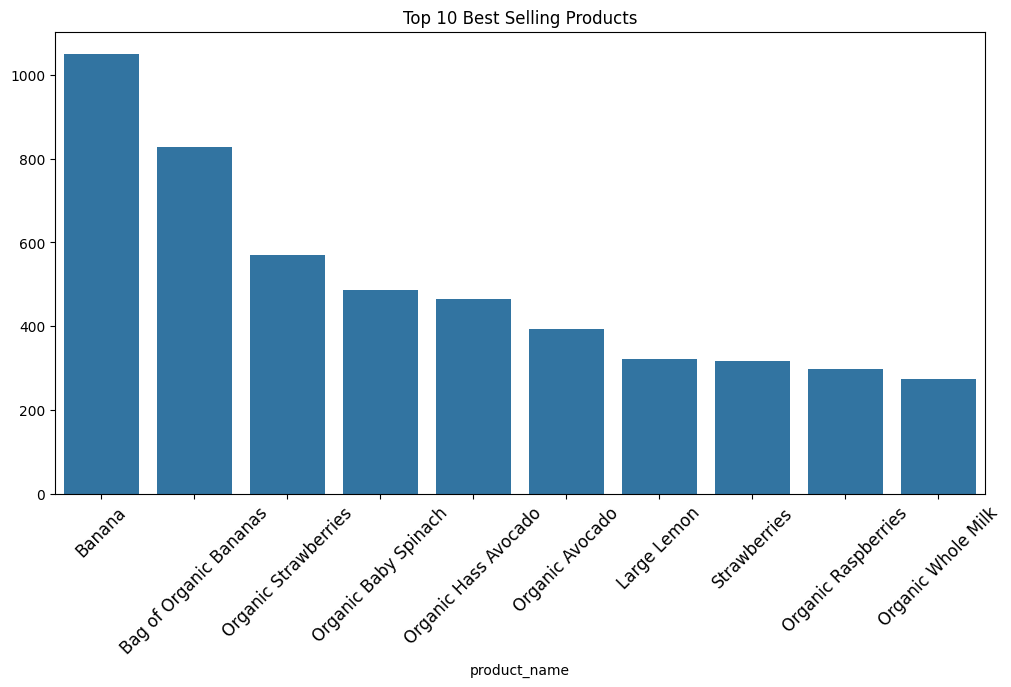

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# التحقق من المنتجات الأكثر مبيعًا
top_products = merged_data['product_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(size=12, rotation=45)
plt.title('Top 10 Best Selling Products')
plt.show()


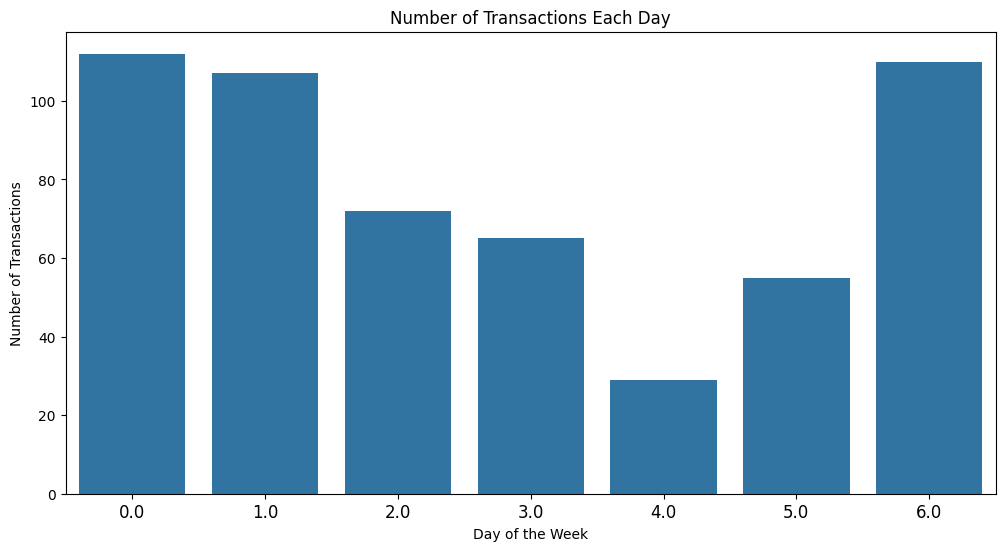

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم عدد المعاملات لكل يوم
plt.figure(figsize=(12, 6))

# حساب عدد المعاملات لكل يوم من الأسبوع
sns.barplot(x=merged_data['order_dow'].value_counts().index,
            y=merged_data['order_dow'].value_counts().values)

plt.xticks(size=12)
plt.title('Number of Transactions Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


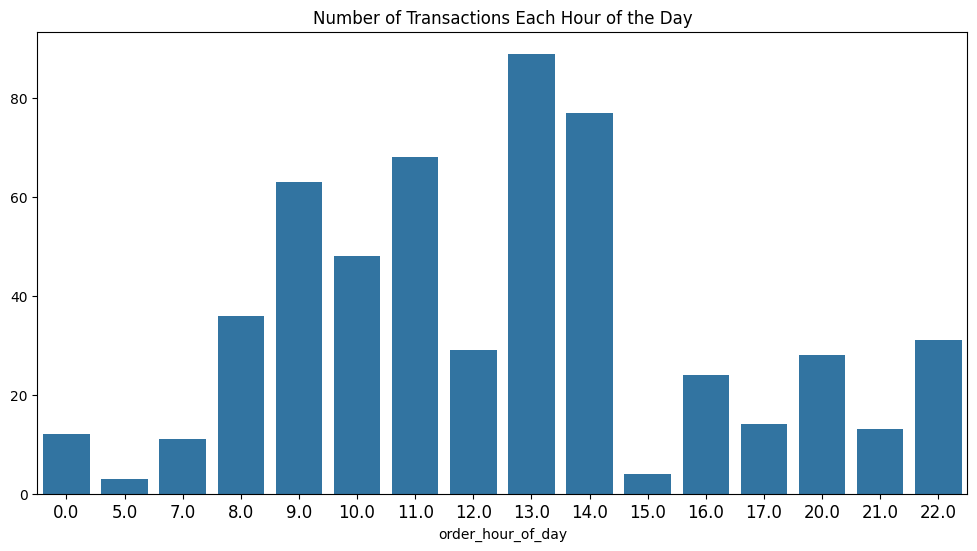

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم عدد المعاملات لكل ساعة من اليوم
plt.figure(figsize=(12,6))

# Replace 'data' with 'merged_data'
sns.barplot(x=merged_data['order_hour_of_day'].value_counts().index,
            y=merged_data['order_hour_of_day'].value_counts().values)

plt.xticks(size=12)
plt.title('Number of Transactions Each Hour of the Day')
plt.show()

In [ ]:
# حساب عدد المنتجات المشتراة لكل عميل في كل طلب
item_count = merged_data.groupby(['user_id', 'order_id', 'product_name'])['product_name'].count().reset_index(name='Count')

# عرض أول 10 نتائج
item_count.head(10)


,user_id,order_id,product_name,Count
0,27.0,7099,Energy Tropical Citrus Vitamin Water Drink,1
1,27.0,7099,Natural Artesian Water,1
2,27.0,7099,Original Turkey Jerky,1
3,27.0,7099,Revive Zero Vitamin Water,1
4,27.0,7099,Teriyaki Turkey Jerky,1
5,27.0,7099,Total 0% Nonfat Greek Yogurt,1
6,27.0,7099,Total 0% Raspberry Yogurt,1
7,27.0,7099,Total 2% Lowfat Greek Strained Yogurt with Peach,1
8,27.0,7099,Total 2% with Strawberry Lowfat Greek Strained...,1
9,27.0,7099,Vitamin Water Zero Rise Orange,1


In [ ]:
# إضافة عمود 'Transaction' لكل مجموعة من المستخدمين والطلبات
item_count['Transaction'] = item_count.groupby(['user_id', 'order_id']).ngroup() + 1

# عرض النتائج
item_count.head(10)


,user_id,order_id,product_name,Count,Transaction
0,27.0,7099,Energy Tropical Citrus Vitamin Water Drink,1,1
1,27.0,7099,Natural Artesian Water,1,1
2,27.0,7099,Original Turkey Jerky,1,1
3,27.0,7099,Revive Zero Vitamin Water,1,1
4,27.0,7099,Teriyaki Turkey Jerky,1,1
5,27.0,7099,Total 0% Nonfat Greek Yogurt,1,1
6,27.0,7099,Total 0% Raspberry Yogurt,1,1
7,27.0,7099,Total 2% Lowfat Greek Strained Yogurt with Peach,1,1
8,27.0,7099,Total 2% with Strawberry Lowfat Greek Strained...,1,1
9,27.0,7099,Vitamin Water Zero Rise Orange,1,1


In [ ]:
# التحقق من الأعمدة الموجودة في merged_data
print(merged_data.columns)


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'order_dow',
       'order_hour_of_day'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


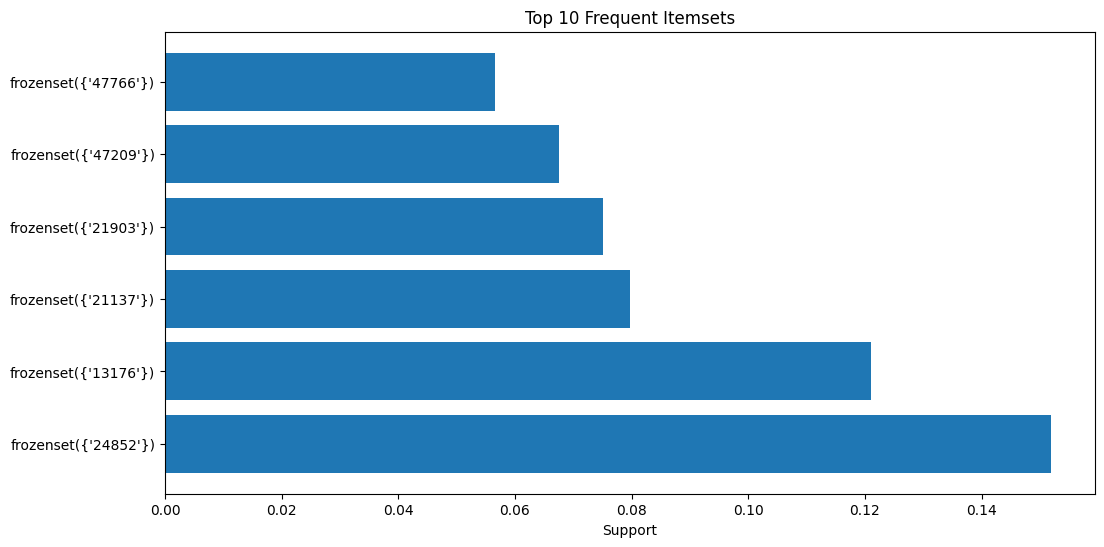

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive


# Load data from Google Drive
data = pd.read_csv('/content/order_products__prior.csv', encoding='latin1')

# Print the actual column names in your DataFrame
print(data.columns)

# Clean data from missing values
# Replace with the actual column names from your DataFrame
# For example, if your column names are 'order_id', 'product_id', 'add_to_cart_order', and 'reordered', use:
data_cleaned = data.dropna(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])

# Exclude negative quantities
# Assuming 'add_to_cart_order' represents quantity, adjust as needed
data_cleaned = data_cleaned[data_cleaned['add_to_cart_order'] > 0]

# Check for duplicates
# Adjust column names as needed
data_cleaned.drop_duplicates(subset=['order_id', 'product_id'], inplace=True)

# Filter out low-frequency items
# Adjust column names as needed
item_counts = data_cleaned['product_id'].value_counts()
data_cleaned = data_cleaned[data_cleaned['product_id'].isin(item_counts[item_counts > 5].index)]

# Convert to basket format
# Adjust column names as needed
basket = data_cleaned.groupby('order_id')['product_id'].apply(list).reset_index()

# Convert product_id lists to strings before one-hot encoding
basket['product_id'] = basket['product_id'].apply(lambda x: [str(i) for i in x]) # Convert items in list to strings

# One-hot encoding of items
basket_encoded = basket['product_id'].str.join('|').str.get_dummies('|')

# Apply FP-Growth
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.05, use_colnames=True)

# Sort and display top 10 frequent itemsets
top_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_itemsets['itemsets'].astype(str), top_itemsets['support'])
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.show()

# Generate and display association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules.sort_values('lift', ascending=False).head(10))

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Generate frequent itemsets using FP-Growth
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Sort by confidence
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Sort by confidence
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
29,(28204),(24852),0.010660,0.381125,2.510126
27,(49683),(24852),0.010965,0.352365,2.320711
21,(47766),(24852),0.017158,0.303411,1.998294
15,(27966),(13176),0.013097,0.297921,2.460694
31,(16797),(24852),0.013249,0.288079,1.897318
6,(47209),(13176),0.018986,0.280992,2.320862
25,(47626),(24852),0.012133,0.258378,1.701704
23,(27845),(24852),0.010305,0.248470,1.636446
32,(26209),(24852),0.010153,0.232558,1.531649
17,(21137),(24852),0.018123,0.227244,1.496648
